In [55]:
from pandas import *
import numpy
import matplotlib.pyplot as plt
from random import shuffle  # Import shuffle

(17, 17)


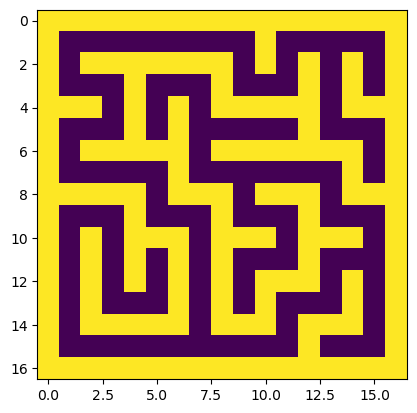

In [56]:
def make_maze(w, h):
    vis = [[0] * w + [1] for _ in range(h)] + [[1] * (w + 1)]
    ver = [["10"] * w + ['1'] for _ in range(h)] + [[]]
    hor = [["11"] * w + ['1'] for _ in range(h + 1)]

    def walk(x, y):
        vis[y][x] = 1

        d = [(x - 1, y), (x, y + 1), (x + 1, y), (x, y - 1)]
        shuffle(d)
        for (xx, yy) in d:
            if vis[yy][xx]: continue
            if xx == x: hor[max(y, yy)][x] = "10"
            if yy == y: ver[y][max(x, xx)] = "00"
            walk(xx, yy)

    walk(numpy.random.randint(w), numpy.random.randint(h))

    s = ""
    for (a, b) in zip(hor, ver):
        s += ''.join(a + ['\n'] + b + ['\n'])

    M=[]
    for line in s.split("\n"):
        if line!="":
            R=[]
            for e in line:
                R.append(int(e))
            M.append(R)
    return M

maze=numpy.array(make_maze(8,8))
plt.imshow(maze)

print(maze.shape)

In [57]:
#maze
startLocation=[1,1]
targetLocation=[15,15]

In [58]:
maze[1][1]

0

In [59]:
maze[15][15] ## Should always output 0 otherwise maze is unsolvable

0

In [67]:
def getNeighbors(current, grid):
    x, y = current  # Unpack current into x and y
    nb = list()
    xm = [0, 1, 0, -1]  # Directions: Right, Down, Left, Up
    ym = [1, 0, -1, 0]
    
    for i in range(4):
        nx, ny = x + xm[i], y + ym[i]
        
        # Check if the neighbor is within bounds and is a walkable cell (1)
        if 0 <= nx < len(grid) and 0 <= ny < len(grid[0]) and grid[nx][ny] == 1:
            nb.append([nx, ny])  # Add valid neighbor
    
    return nb


[[0, 1], [1, 0], [0, -1], [-1, 0]]

In [ ]:
def calculateActualCost(current_node, neighbor_node):
    return 1  # Uniform movement cost

In [ ]:
def calculateHeuristicCost(current_node, goal_node):
    x1, y1 = current_node
    x2, y2 = goal
    return abs(x1 - x2) + abs(y1 - y2)
    

In [ ]:
from queue import PriorityQueue

def a_star_search(grid, start_pos, goal_pos):
    """
    Perform A* search on a grid.
    
    Args:
        grid: 2D list representing the maze. 0 = wall, 1 = pathway.
        start_pos: Tuple (x, y) for the start position.
        goal_pos: Tuple (x, y) for the goal position.
        
    Returns:
        A tuple (came_from, cost_so_far) where:
            - came_from: Dictionary tracking the path.
            - cost_so_far: Dictionary of costs to reach each node.
    """
    # Initialize priority queue, path tracking, and costs
    frontier = PriorityQueue()
    frontier.put((0, start_pos))  # (priority, node)
    came_from = {start_pos: None}
    cost_so_far = {start_pos: 0}

    while not frontier.empty():
        # Get the node with the lowest priority
        _, current = frontier.get()

        # Stop if we reached the goal
        if current == goal_pos:
            break

        # Explore neighbors
        for next in getNeighbors(current, grid):
            # Skip walls
            if grid[next[0]][next[1]] == 0:
                continue

            # Calculate new cost
            new_cost = cost_so_far[current] + calculateActualCost(current, next)
            
            # If next is not visited or a cheaper path is found
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost  # Update cost
                priority = new_cost + calculateHeuristicCost(next, goal_pos)
                frontier.put((priority, next))  # Push to the queue
                came_from[next] = current  # Track the path

    return came_from, cost_so_far
